### Implementing following methods of TMA for obtaining trend line on a dataset:
a. Free hand method

b. Semi-average method

c. Moving average method

d. Least square method

### Helper functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw_plot(x, y, xLabel="", yLabel="", title="plot"):
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.scatter(x, y)
    plt.plot(x, y)

In [3]:
def semi_average(x, y):
    n = len(x)
    a = y[0:int(n/2)]
    b = y[int(n/2):]
    avg_a = sum(a) / len(a)
    avg_b = sum(b) / len(b)
    new_y = [avg_a, avg_b]
    new_x = [int(n/4), int(3*n/4)]
    return (new_x, new_y)

In [4]:
def moving_average(x, y):
    n = len(x)
    new_x = []
    new_y = []
    sm = y[0] + y[1] + y[2]

    new_x.append(x[1])
    new_y.append(sm)
    for i in range(3,n-1):
        sm -= y[i-2]
        sm += y[i]
        new_y.append(sm)
        new_x.append(x[i-1])
    return (new_x, new_y)

In [5]:
def ls_average(x, y):
    x = np.array(x)
    y = np.array(y)
    plt.plot(x, y, 'o')
    m, b = np.polyfit(x, y, 1)
    plt.title("Least square method")
    plt.plot(x, m*x+b)

### 1. Data set 1:- supermarket data with order date and shipping date

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/supermarket_sales.csv")

In [7]:
df["Date"] = [i.split('/')[1] for i in df["Date"]]

In [8]:
df = df.sort_values(by=['Date'])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
169,105-31-1824,A,Yangon,Member,Male,Sports and travel,69.52,7,24.3320,510.9720,1,15:10,Credit card,486.64,4.761905,24.3320,8.5
450,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.4130,470.6730,1,19:07,Cash,448.26,4.761905,22.4130,6.7
312,870-76-1733,A,Yangon,Member,Female,Food and beverages,14.23,5,3.5575,74.7075,1,10:08,Credit card,71.15,4.761905,3.5575,4.4
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.4900,388.2900,1,19:48,Credit card,369.80,4.761905,18.4900,7.0
518,220-28-1851,A,Yangon,Normal,Male,Home and lifestyle,34.73,2,3.4730,72.9330,1,18:14,Ewallet,69.46,4.761905,3.4730,9.7


In [9]:
data = {}
for index, row in df.iterrows():
  date = row["Date"]
  if date not in data.keys():
    data[date] = 0
  data[date] += row["Total"]

x = list(data.keys())
x = [int(i) for i in x]
x.sort()
y = []
for i in x:
  y.append(data[str(i)])

#### 1.a Free hand method

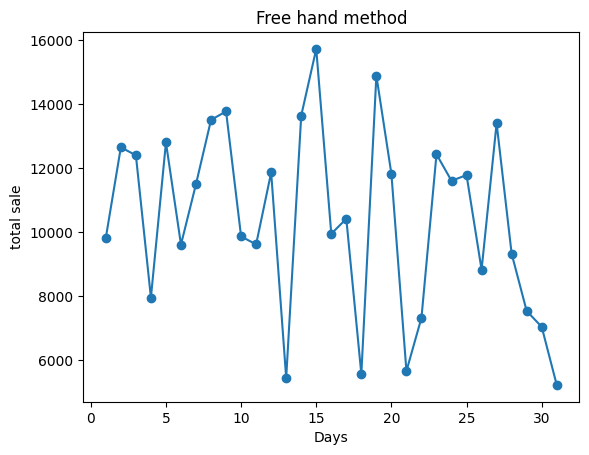

In [10]:
draw_plot(x, y, "Days", "total sale", "Free hand method")

#### 1.b Semi-average method

In [11]:
new_x, new_y = semi_average(x, y)
print("new_x:", new_x)
print("new_y:", new_y)

new_x: [7, 23]
new_y: [11343.807299999997, 9550.60246875]


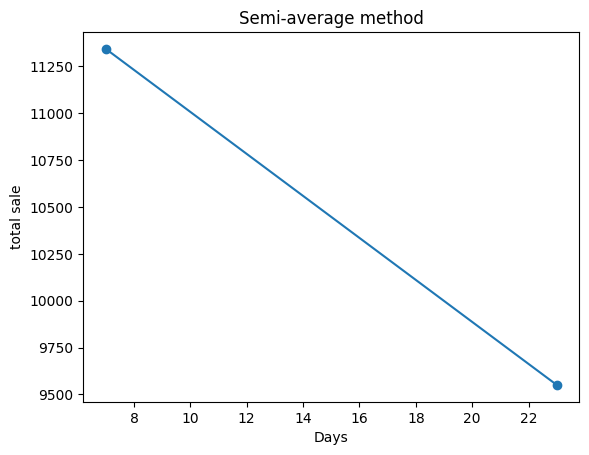

In [12]:
draw_plot(new_x, new_y, "Days", "total sale", "Semi-average method")

#### 1.c Moving average method

In [13]:
new_x, new_y = moving_average(x, y)
print("new_x:", new_x)
print("new_y:", new_y)

new_x: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
new_y: [34870.06949999999, 30180.937499999993, 30580.399499999996, 32235.0, 30937.021499999995, 34828.5735, 37095.1455, 33456.57, 29307.6525, 31303.754999999997, 27134.436, 28908.474000000006, 39176.886, 35488.865999999995, 30190.019999999993, 25812.034499999994, 30276.6555, 36527.389500000005, 27307.507500000003, 22813.665, 29579.130000000005, 33854.877, 33206.628, 30432.843, 32050.4415, 32548.382999999998, 26690.0235, 24409.213499999998]


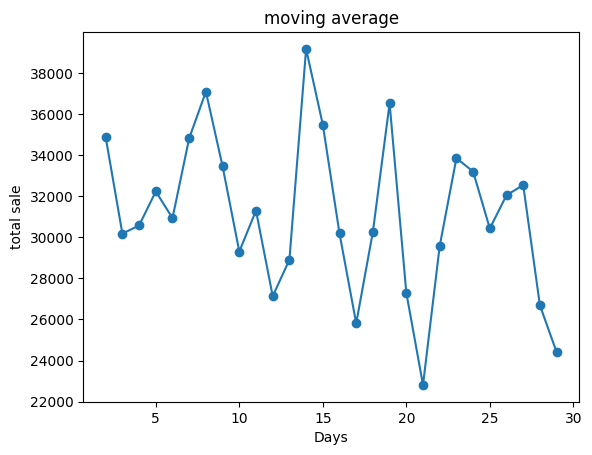

In [14]:
draw_plot(new_x, new_y, "Days", "total sale", "moving average")

#### 1.d Least square method

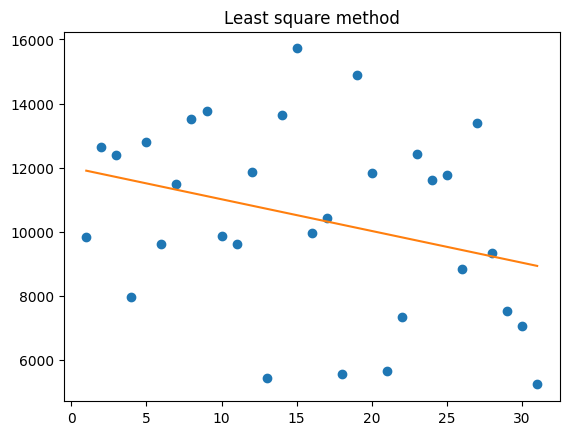

In [15]:
ls_average(x, y)

### 2. Data set 2:- air passenger data

In [16]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Air_Traffic_Passenger_Statistics.csv")

In [17]:
df.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [18]:
y = df["Year"]
data = {}
for index, row in df.iterrows():
  date = row["Year"]
  if date not in data.keys():
    data[date] = 0
  data[date] += row["Passenger Count"]

x = list(data.keys())
x.sort()
y = []
for i in x:
  y.append(data[i])

#### 2.a Free hand method

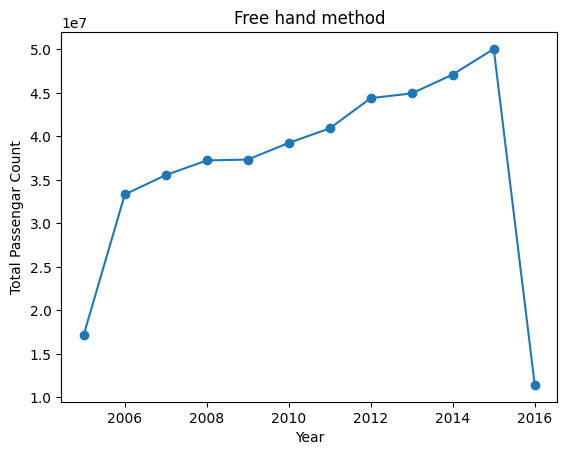

In [19]:
draw_plot(x, y, "Year", "Total Passengar Count", "Free hand method")

#### 2.b Semi-average method

In [20]:
new_x, new_y = semi_average(x, y)
print("new_x:", new_x)
print("new_y:", new_y)

new_x: [3, 9]
new_y: [33322784.0, 39812632.666666664]


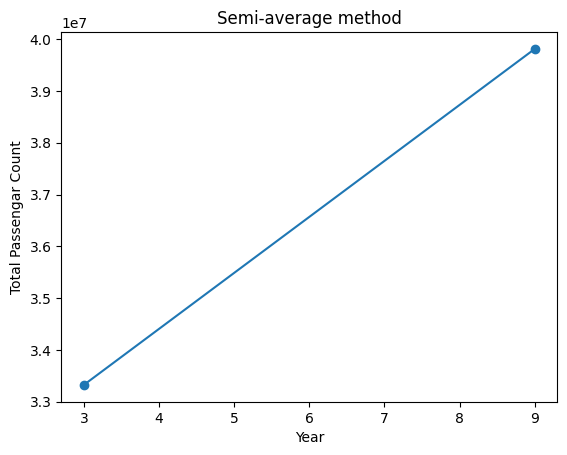

In [21]:
draw_plot(new_x, new_y, "Year", "Total Passengar Count", "Semi-average method")

#### 2.c moving average

In [22]:
new_x, new_y = moving_average(x, y)
print("new_x:", new_x)
print("new_y:", new_y)

new_x: [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
new_y: [86109085, 90010793, 91795653, 93814974, 97403818, 102549704, 106567678, 109282424, 114394551]


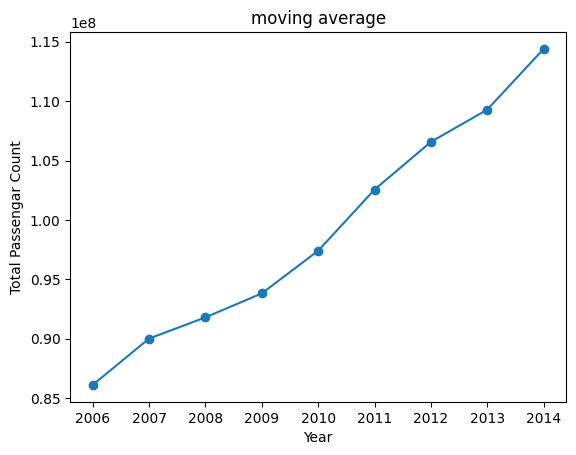

In [23]:
draw_plot(new_x, new_y, "Year", "Total Passengar Count", "moving average")

#### 2.d Least Square Method

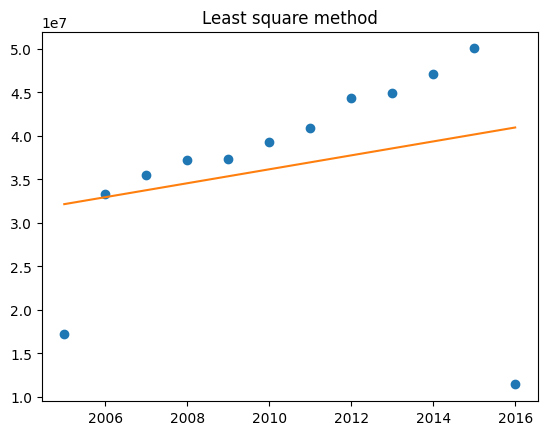

In [24]:
ls_average(x, y)